In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_swiss_roll

# Manifold hypothesis

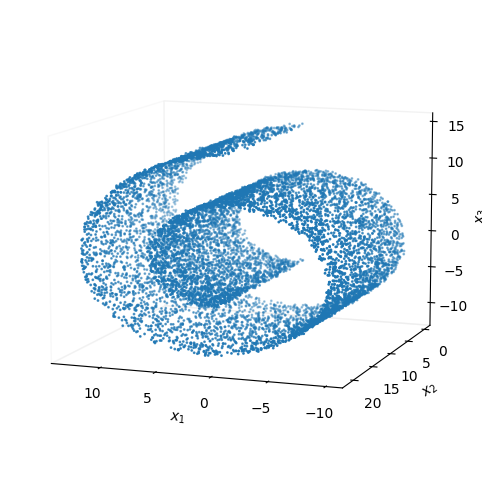

In [2]:
x, _ = make_swiss_roll(10000, noise=0.1)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[:, 0], x[:, 1], x[:, 2], s=1)
ax.view_init(elev=10, azim=110)
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
ax.set_zlabel(r'$x_3$')
ax.grid(False)
plt.show()

# Kernel density estimation

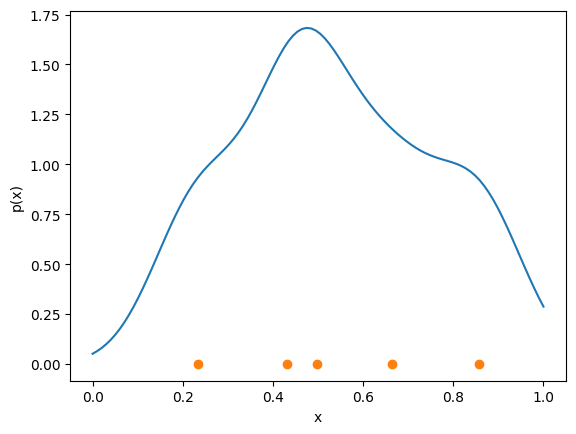

In [13]:
def gaussian_kernel(x, xi, bandwidth):
    return np.exp(-0.5 * ((x - xi) / bandwidth) ** 2) / (np.sqrt(2 * np.pi) * bandwidth)

def kde(data, x_grid, bandwidth=0.1):
    return np.mean([gaussian_kernel(x_grid, xi, bandwidth) for xi in data], axis=0)

data = np.random.rand(5)

x = np.linspace(0, 1, 100)
density = kde(data, x)

plt.plot(x, density)
plt.plot(data, np.zeros_like(data), 'o')
plt.xlabel('x')
plt.ylabel('p(x)')
plt.show()

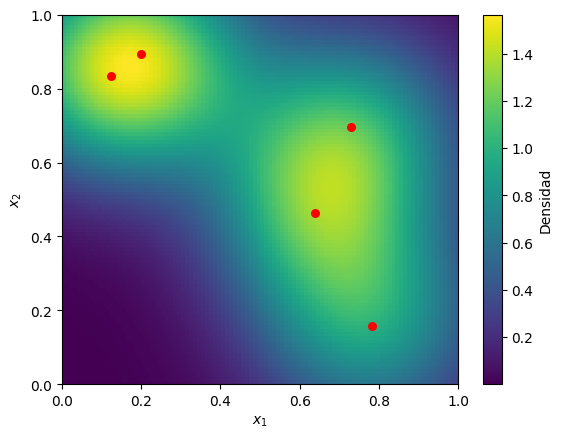

In [12]:
def gaussian_kernel(x, y, xi, yi, bandwidth):
    return np.exp(-0.5 * (((x - xi) ** 2 + (y - yi) ** 2) / bandwidth ** 2)) / (2 * np.pi * bandwidth ** 2)

def kde(data, x_grid, y_grid, bandwidth=0.2):
    density = np.zeros_like(x_grid, dtype=float)
    for xi, yi in zip(data[0], data[1]):
        density += gaussian_kernel(x_grid, y_grid, xi, yi, bandwidth)
    return density / len(data[0])

data = np.random.rand(2, 5)

x_grid, y_grid = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))
density = kde(data, x_grid, y_grid)

plt.imshow(density, origin='lower', extent=[0, 1, 0, 1], cmap='viridis', aspect='auto')
plt.colorbar(label='Densidad')
plt.scatter(data[0], data[1], c='red', s=30)
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.show()